# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

c:\Users\manse\OneDrive\Desktop\dynamic-clustering


In [2]:
colors = get_colors()

def import_and_shuffle_csv(file_path):

  final_2d_data = np.loadtxt(file_path, delimiter=',')

  reference_data = final_2d_data[:1000]
  np.random.shuffle(reference_data)

  batch1 = final_2d_data[1000:1200]
  np.random.shuffle(batch1)

  batch2 = final_2d_data[1200:1400]
  np.random.shuffle(batch2)

  batch3 = final_2d_data[1400:1600]
  np.random.shuffle(batch3)

  batch4 = final_2d_data[1600:1800]
  np.random.shuffle(batch4)

  batch5 = final_2d_data[1800:2000]
  np.random.shuffle(batch5)

  return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [3]:
file_path = './data/final_2d_data_brightness.csv'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [6]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
  clustream_model = CluStream(
      max_micro_clusters=200,
      time_window=100,
      seed=0,
  )
  drift_detector = drift.PageHinkley(threshold=threshold)
  
  dynamic_clusterer = DynamicClusterer(data, clustream_model, drift_detector, colors, x_limits=(-10, 20), y_limits=(0,15), threshold=threshold)
  
  
  return dynamic_clusterer

---------------- THRESHOLD: 5 ----------------------
New model created - id: 27953
{'id': 0, 'center': [np.float64(3.5334347868905684), np.float64(2.925841356477429)], 'radius': np.float64(1.3233847244544212)}
{'id': 1, 'center': [np.float64(5.314008902166489), np.float64(7.024544441811392)], 'radius': np.float64(1.183456409221629)}


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


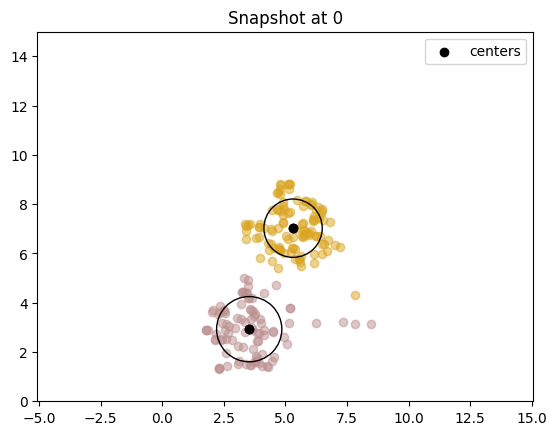

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 24 ----> Apply macroclustering <!>

[np.float64(3.5334347868905684), np.float64(2.925841356477429)] survived as [np.float64(3.647935415624726), np.float64(2.866084278263947)]
[np.float64(5.314008902166489), np.float64(7.024544441811392)] survived as [np.float64(5.376849610100751), np.float64(7.024901427562884)]

(!) Macroclustering triggered at timestamp: 24 -----> Update referential result

-----------------------------------------------------------------------------------



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


<!> Change detected! Possible input drift at timestamp 218 ----> Apply macroclustering <!>

[np.float64(5.376849610100751), np.float64(7.024901427562884)] survived as [np.float64(6.074122127364659), np.float64(6.67379554346496)]
[np.float64(3.647935415624726), np.float64(2.866084278263947)] survived as [np.float64(4.301460278682968), np.float64(2.6519074249429786)]

(!) Macroclustering triggered at timestamp: 218 -----> Update referential result

-----------------------------------------------------------------------------------



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


<!> Change detected! Possible input drift at timestamp 444 ----> Apply macroclustering <!>

[np.float64(4.301460278682968), np.float64(2.6519074249429786)] survived as [np.float64(3.592018510844254), np.float64(2.9591648804174886)]
[np.float64(6.074122127364659), np.float64(6.67379554346496)] survived as [np.float64(5.404536975281579), np.float64(7.105283592428476)]
(!) [np.float64(8.079524185798617), np.float64(3.720194791707664)] appeared

(!) Macroclustering triggered at timestamp: 444 -----> Update referential result

-----------------------------------------------------------------------------------



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Batch Finished ----> Apply macroclustering

[np.float64(8.079524185798617), np.float64(3.720194791707664)] survived as [np.float64(9.185183134617562), np.float64(3.390416990134343)]
[np.float64(5.404536975281579), np.float64(7.105283592428476)] survived as [np.float64(5.210031767686207), np.float64(7.165482074022293)]
[np.float64(3.592018510844254), np.float64(2.9591648804174886)] survived as [np.float64(3.423750227497469), np.float64(3.0201968608363994)]

(!) Macroclustering triggered at timestamp: 1000 -----> Update referential result

-----------------------------------------------------------------------------------



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


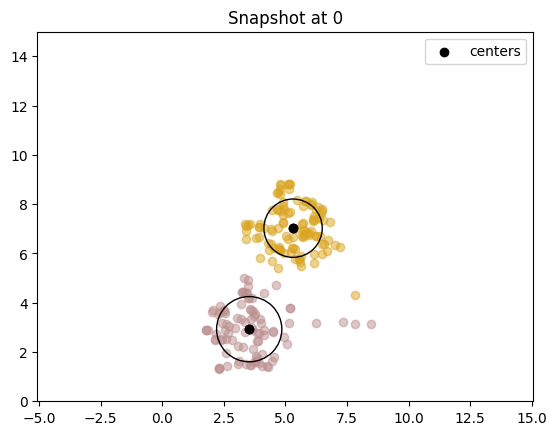

<Figure size 1000x1000 with 0 Axes>

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


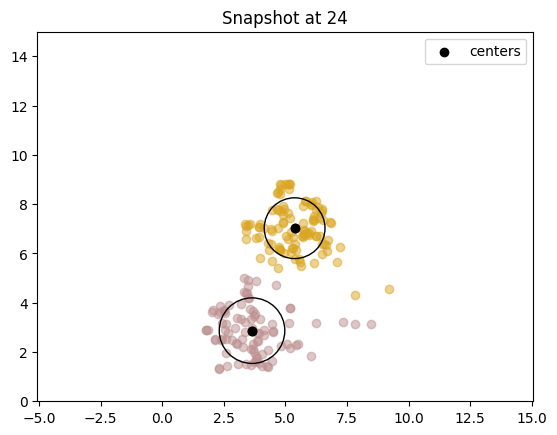

<Figure size 1000x1000 with 0 Axes>

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


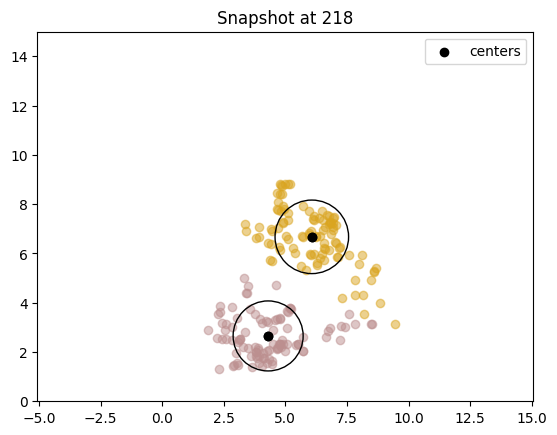

<Figure size 1000x1000 with 0 Axes>

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


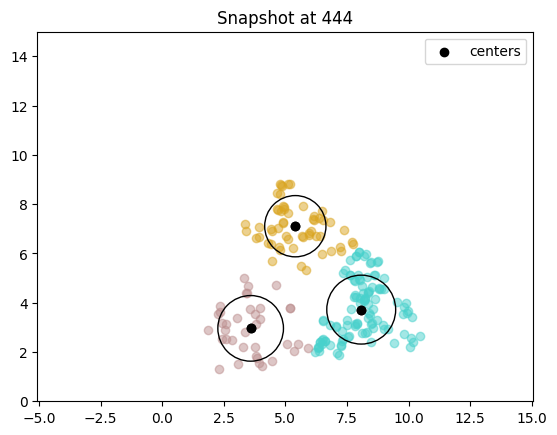

<Figure size 1000x1000 with 0 Axes>

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


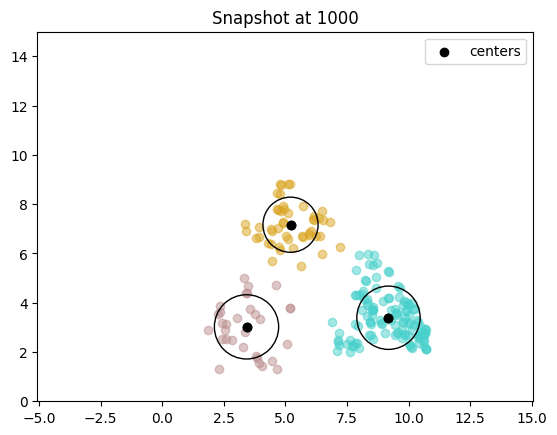

<Figure size 1000x1000 with 0 Axes>

In [8]:
thresholds=[5]
for threshold in thresholds:
  print(f'---------------- THRESHOLD: {threshold} ----------------------')
  clustream = init_dynamic_clusterer(threshold=threshold)

  id = clustream.get_id()
  ids.append(id)

  clustream.receive_prod(full_prod_data)
  clustream.fit_prod_data(plot_img=False, macroclustering_at_end=True)

  clustream.draw_snapshots()
  clustream.draw_gif()

In [9]:
# Clean directory

for id in ids:
    clean_directory(f"./plots/{id}")

Directory './plots/50996' and its contents removed successfully.
Directory './plots/27953' and its contents removed successfully.
